Nama : Whinar Kukuh Rizky Ardana<br>
Universitas : Universitas Jember<br>
alamat : Tuban, Jawa Timur<br>
email : Ardana.rizky33@gmail.com


In [ ]:
import tensorflow as tf

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-11-01 02:53:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.04MB/s    in 45s     

2020-11-01 02:54:05 (6.85 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile

In [ ]:
import os

fileZip = '/tmp/rockpaperscissors.zip'
openZip = zipfile.ZipFile(fileZip, 'r')
openZip.extractall('/tmp')
openZip.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors', 'rps-cv-images']

In [ ]:
pip install split_folders

In [ ]:
import splitfolders
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
splitfolders.ratio(base_dir, output="/tmp/rockpaperscissors", ratio=(.6, .4))

train_dir = os.path.join("/tmp/rockpaperscissors", "train")
validation_dir = os.path.join("/tmp/rockpaperscissors", "val")

Copying files: 2188 files [00:00, 4209.50 files/s]


In [ ]:
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')

In [ ]:
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size=0.4, random_state=21)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size=0.4, random_state=21)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size=0.4, random_state=21)

In [ ]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')

val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
test_datagen.flow_from_directory?

In [ ]:
model.compile(optimizer='adamax',
              loss='MSE',
              metrics=['accuracy'])

In [ ]:
model.fit?

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=15,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5
    # verbose=2,
)

Epoch 1/20
15/15 [==============================] - 25s 2s/step - loss: 0.0153 - accuracy: 0.9750 - val_loss: 0.0188 - val_accuracy: 0.9625
Epoch 2/20
15/15 [==============================] - 25s 2s/step - loss: 0.0163 - accuracy: 0.9729 - val_loss: 0.0132 - val_accuracy: 0.9750
Epoch 3/20
15/15 [==============================] - 27s 2s/step - loss: 0.0084 - accuracy: 0.9896 - val_loss: 0.0217 - val_accuracy: 0.9438
Epoch 4/20
15/15 [==============================] - 25s 2s/step - loss: 0.0139 - accuracy: 0.9771 - val_loss: 0.0189 - val_accuracy: 0.9625
Epoch 5/20
15/15 [==============================] - 25s 2s/step - loss: 0.0145 - accuracy: 0.9729 - val_loss: 0.0216 - val_accuracy: 0.9563
Epoch 6/20
15/15 [==============================] - 27s 2s/step - loss: 0.0153 - accuracy: 0.9708 - val_loss: 0.0222 - val_accuracy: 0.9563
Epoch 7/20
15/15 [==============================] - 25s 2s/step - loss: 0.0153 - accuracy: 0.9708 - val_loss: 0.0374 - val_accuracy: 0.9250
Epoch 8/20
15/15 [==

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

print('\nTest accuracy:', test_acc)

28/28 - 16s - loss: 0.0198 - accuracy: 0.9623

Test accuracy: 0.9623287916183472


Saving photo_2020-11-01_00-22-49.jpg to photo_2020-11-01_00-22-49.jpg
photo_2020-11-01_00-22-49.jpg
paper


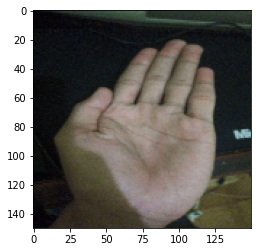

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('not recognize')